# **CHAPTER 11**
# **Time Series**

## **11.1 Date and Time Data Types and Tools**

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2020, 12, 31, 2, 17, 20, 907906)

In [4]:
now.year, now.month, now.day

(2020, 12, 31)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
 start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### **Converting Between String and Datetime**

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
 [datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

## **11.2 Time Series Basics**

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
import pandas as pd
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
idx[2]

NaT

In [29]:
pd.isnull(idx)

array([False, False,  True])

## **11.2 Time Series Basics**

In [30]:
from datetime import datetime
import numpy as np

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
ts = pd.Series(np.random.randn(6), index=dates)

In [33]:
 ts

2011-01-02   -0.005047
2011-01-05   -0.142645
2011-01-07   -0.164024
2011-01-08    0.893691
2011-01-10   -0.075369
2011-01-12   -0.025229
dtype: float64

In [34]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [35]:
ts + ts[::2]

2011-01-02   -0.010094
2011-01-05         NaN
2011-01-07   -0.328047
2011-01-08         NaN
2011-01-10   -0.150738
2011-01-12         NaN
dtype: float64

In [36]:
ts.index.dtype

dtype('<M8[ns]')

In [37]:
stamp = ts.index[0]

In [38]:
stamp

Timestamp('2011-01-02 00:00:00')

### **Indexing, Selection, Subsetting**

In [39]:
stamp = ts.index[2]

In [40]:
 ts[stamp]

-0.16402364443642614

In [41]:
ts['1/10/2011']

-0.07536920806104744

In [42]:
ts['20110110']

-0.07536920806104744

In [43]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [44]:
longer_ts

2000-01-01    0.136139
2000-01-02    1.633194
2000-01-03   -0.028014
2000-01-04   -1.567171
2000-01-05    0.339788
                ...   
2002-09-22    1.002189
2002-09-23   -0.337920
2002-09-24    2.069721
2002-09-25    1.997550
2002-09-26   -1.286013
Freq: D, Length: 1000, dtype: float64

In [45]:
longer_ts['2001']

2001-01-01    0.110667
2001-01-02   -0.936728
2001-01-03   -0.049087
2001-01-04   -1.138737
2001-01-05   -0.270237
                ...   
2001-12-27   -0.996798
2001-12-28   -1.133883
2001-12-29   -0.981886
2001-12-30   -0.123807
2001-12-31    0.020644
Freq: D, Length: 365, dtype: float64

In [46]:
longer_ts['2001-05']

2001-05-01   -0.008751
2001-05-02    2.134581
2001-05-03    0.688903
2001-05-04    0.092382
2001-05-05   -0.403738
2001-05-06   -4.502980
2001-05-07   -0.263446
2001-05-08   -0.286035
2001-05-09   -0.523539
2001-05-10    1.103992
2001-05-11    1.615734
2001-05-12   -0.693383
2001-05-13   -0.031463
2001-05-14   -0.958217
2001-05-15   -0.185246
2001-05-16    0.494334
2001-05-17   -0.001454
2001-05-18    0.089776
2001-05-19    1.267531
2001-05-20   -1.286407
2001-05-21    0.476435
2001-05-22   -0.467910
2001-05-23    0.821024
2001-05-24    0.311579
2001-05-25    1.031360
2001-05-26   -0.259394
2001-05-27   -0.118789
2001-05-28    1.315835
2001-05-29   -0.492772
2001-05-30    0.003241
2001-05-31   -0.156282
Freq: D, dtype: float64

In [47]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.164024
2011-01-08    0.893691
2011-01-10   -0.075369
2011-01-12   -0.025229
dtype: float64

In [48]:
 ts

2011-01-02   -0.005047
2011-01-05   -0.142645
2011-01-07   -0.164024
2011-01-08    0.893691
2011-01-10   -0.075369
2011-01-12   -0.025229
dtype: float64

In [49]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.164024
2011-01-08    0.893691
2011-01-10   -0.075369
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.005047
2011-01-05   -0.142645
2011-01-07   -0.164024
2011-01-08    0.893691
dtype: float64

In [51]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [52]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [53]:
long_df.loc['5-2001']

Colorado     Texas  New York      Ohio
2001-05-02 -1.400026  1.411559  0.254994 -0.384356
2001-05-09 -0.181265  0.297314 -1.712224 -0.663979
2001-05-16  1.670056 -0.451358 -1.051491 -0.321228
2001-05-23 -0.051725 -0.710136  0.785456 -1.599411
2001-05-30 -1.575215 -0.273659 -0.663592 -0.757973

### **Time Series with Duplicate Indices**

In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [55]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [57]:
dup_ts.index.is_unique

False

In [58]:
dup_ts['1/3/2000'] # not duplicated

4

In [59]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [60]:
grouped = dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [62]:
 grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## **11.3 Date Ranges, Frequencies, and Shifting**

In [63]:
ts

2011-01-02   -0.005047
2011-01-05   -0.142645
2011-01-07   -0.164024
2011-01-08    0.893691
2011-01-10   -0.075369
2011-01-12   -0.025229
dtype: float64

In [64]:
resampler = ts.resample('D')

### **Generating Date Ranges**

In [65]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [66]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [67]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [70]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### **Frequencies and Date Offsets**

In [72]:
from pandas.tseries.offsets import Hour, Minute

In [73]:
hour = Hour()

In [74]:
hour

<Hour>

In [75]:
four_hours = Hour(4)

In [76]:
 four_hours

<4 * Hours>

In [77]:
 pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [78]:
Hour(2) + Minute(30)

<150 * Minutes>

In [79]:
 pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### **Week of month dates**

In [80]:
 rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [81]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### **Shifting (Leading and Lagging) Data**

In [82]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [83]:
ts

2000-01-31    0.347606
2000-02-29    0.954201
2000-03-31    2.272837
2000-04-30    1.067468
Freq: M, dtype: float64

In [84]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.347606
2000-04-30    0.954201
Freq: M, dtype: float64

In [85]:
 ts.shift(-2)

2000-01-31    2.272837
2000-02-29    1.067468
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [86]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.745065
2000-03-31    1.381927
2000-04-30   -0.530337
Freq: M, dtype: float64

In [87]:
ts.shift(2, freq='M')

2000-03-31    0.347606
2000-04-30    0.954201
2000-05-31    2.272837
2000-06-30    1.067468
Freq: M, dtype: float64

In [88]:
ts.shift(3, freq='D')

2000-02-03    0.347606
2000-03-03    0.954201
2000-04-03    2.272837
2000-05-03    1.067468
dtype: float64

In [89]:
ts.shift(3, freq='D')

2000-02-03    0.347606
2000-03-03    0.954201
2000-04-03    2.272837
2000-05-03    1.067468
dtype: float64

#### **Shifting dates with offsets**

In [90]:
from pandas.tseries.offsets import Day, MonthEnd

In [91]:
now = datetime(2011, 11, 17)

In [92]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [93]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [94]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [95]:
offset = MonthEnd()

In [96]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [97]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [98]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [99]:
ts

2000-01-15   -0.954997
2000-01-19    0.785702
2000-01-23    0.748188
2000-01-27    1.085889
2000-01-31   -0.377110
2000-02-04    1.146237
2000-02-08    0.816190
2000-02-12    1.668282
2000-02-16   -0.961316
2000-02-20    0.289476
2000-02-24   -1.330923
2000-02-28    1.680942
2000-03-03    1.567882
2000-03-07   -1.861531
2000-03-11   -0.235278
2000-03-15   -1.486697
2000-03-19   -0.327982
2000-03-23    0.121314
2000-03-27   -0.650154
2000-03-31   -0.021231
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.257534
2000-02-29    0.472698
2000-03-31   -0.361710
dtype: float64

In [101]:
ts.resample('M').mean()

2000-01-31    0.257534
2000-02-29    0.472698
2000-03-31   -0.361710
Freq: M, dtype: float64

## **11.4 Time Zone Handling**

In [102]:
 import pytz

In [103]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
tz = pytz.timezone('America/New_York')

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### **Time Zone Localization and Conversion**

In [106]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [108]:
ts

2012-03-09 09:30:00   -0.052755
2012-03-10 09:30:00    0.370822
2012-03-11 09:30:00   -0.204275
2012-03-12 09:30:00   -1.502418
2012-03-13 09:30:00    0.877193
2012-03-14 09:30:00    1.095083
Freq: D, dtype: float64

In [109]:
print(ts.index.tz)

None


In [110]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [111]:
ts

2012-03-09 09:30:00   -0.052755
2012-03-10 09:30:00    0.370822
2012-03-11 09:30:00   -0.204275
2012-03-12 09:30:00   -1.502418
2012-03-13 09:30:00    0.877193
2012-03-14 09:30:00    1.095083
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00   -0.052755
2012-03-10 09:30:00+00:00    0.370822
2012-03-11 09:30:00+00:00   -0.204275
2012-03-12 09:30:00+00:00   -1.502418
2012-03-13 09:30:00+00:00    0.877193
2012-03-14 09:30:00+00:00    1.095083
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.052755
2012-03-10 04:30:00-05:00    0.370822
2012-03-11 05:30:00-04:00   -0.204275
2012-03-12 05:30:00-04:00   -1.502418
2012-03-13 05:30:00-04:00    0.877193
2012-03-14 05:30:00-04:00    1.095083
Freq: D, dtype: float64

In [116]:
ts_eastern = ts.tz_localize('America/New_York')

In [117]:
 ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.052755
2012-03-10 14:30:00+00:00    0.370822
2012-03-11 13:30:00+00:00   -0.204275
2012-03-12 13:30:00+00:00   -1.502418
2012-03-13 13:30:00+00:00    0.877193
2012-03-14 13:30:00+00:00    1.095083
dtype: float64

In [118]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.052755
2012-03-10 15:30:00+01:00    0.370822
2012-03-11 14:30:00+01:00   -0.204275
2012-03-12 14:30:00+01:00   -1.502418
2012-03-13 14:30:00+01:00    0.877193
2012-03-14 14:30:00+01:00    1.095083
dtype: float64

In [119]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### **Operations with Time Zone−Aware Timestamp Objects**

In [120]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [121]:
stamp_utc = stamp.tz_localize('utc')

In [122]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [123]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [124]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [125]:
stamp_utc.value

1299902400000000000

In [126]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [127]:
from pandas.tseries.offsets import Hour

In [128]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [129]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [130]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [131]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [132]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [133]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### **Operations Between Different Time Zones**

In [134]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [135]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [136]:
ts

2012-03-07 09:30:00    0.199313
2012-03-08 09:30:00    0.361783
2012-03-09 09:30:00   -0.650367
2012-03-12 09:30:00    0.741953
2012-03-13 09:30:00   -0.775517
2012-03-14 09:30:00    1.816890
2012-03-15 09:30:00   -0.043155
2012-03-16 09:30:00    0.769033
2012-03-19 09:30:00   -0.183371
2012-03-20 09:30:00   -0.835354
Freq: B, dtype: float64

In [137]:
ts1 = ts[:7].tz_localize('Europe/London')

In [138]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [139]:
result = ts1 + ts2

In [140]:
 result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## **11.5 Periods and Period Arithmetic**

In [141]:
 p = pd.Period(2007, freq='A-DEC')

In [142]:
 p

Period('2007', 'A-DEC')

In [143]:
p + 5

Period('2012', 'A-DEC')

In [144]:
p - 2

Period('2005', 'A-DEC')

In [145]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [146]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [147]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [148]:
 pd.Series(np.random.randn(6), index=rng)

2000-01   -0.529622
2000-02    0.555297
2000-03   -0.013696
2000-04   -1.098477
2000-05   -0.505439
2000-06   -0.363549
Freq: M, dtype: float64

In [149]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [150]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [151]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### **Period Frequency Conversion**

In [152]:
p = pd.Period('2007', freq='A-DEC')

In [153]:
 p

Period('2007', 'A-DEC')

In [154]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [155]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [156]:
p = pd.Period('2007', freq='A-JUN')

In [157]:
p

Period('2007', 'A-JUN')

In [158]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [159]:
 p.asfreq('M', 'end')

Period('2007-06', 'M')

In [160]:
p = pd.Period('Aug-2007', 'M')

In [161]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [162]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [163]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [164]:
ts.asfreq('M', how='start')

2006-01    1.098990
2007-01    0.413406
2008-01   -0.180556
2009-01    0.142280
Freq: M, dtype: float64

In [165]:
ts.asfreq('B', how='end')

2006-12-29    1.098990
2007-12-31    0.413406
2008-12-31   -0.180556
2009-12-31    0.142280
Freq: B, dtype: float64

### **Quarterly Period Frequencies**

In [166]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [167]:
 p

Period('2012Q4', 'Q-JAN')

In [168]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [169]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [170]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [171]:
p4pm

Period('2012-01-30 16:00', 'T')

In [172]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [173]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [174]:
 ts = pd.Series(np.arange(len(rng)), index=rng)

In [175]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [176]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [177]:
ts.index = new_rng.to_timestamp()

In [178]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### **Converting Timestamps to Periods (and Back)**

In [179]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [180]:
ts = pd.Series(np.random.randn(3), index=rng)

In [181]:
ts

2000-01-31    0.256686
2000-02-29   -0.925298
2000-03-31   -0.074360
Freq: M, dtype: float64

In [182]:
pts = ts.to_period()

In [183]:
pts

2000-01    0.256686
2000-02   -0.925298
2000-03   -0.074360
Freq: M, dtype: float64

In [184]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [185]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [186]:
ts2

2000-01-29   -0.077454
2000-01-30   -1.366123
2000-01-31    0.808214
2000-02-01   -0.211328
2000-02-02   -0.093958
2000-02-03   -1.497988
Freq: D, dtype: float64

In [187]:
ts2.to_period('M')

2000-01   -0.077454
2000-01   -1.366123
2000-01    0.808214
2000-02   -0.211328
2000-02   -0.093958
2000-02   -1.497988
Freq: M, dtype: float64

In [188]:
pts = ts2.to_period()

In [189]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.077454
2000-01-30 23:59:59.999999999   -1.366123
2000-01-31 23:59:59.999999999    0.808214
2000-02-01 23:59:59.999999999   -0.211328
2000-02-02 23:59:59.999999999   -0.093958
2000-02-03 23:59:59.999999999   -1.497988
Freq: D, dtype: float64

### **Creating a PeriodIndex from Arrays**

In [190]:
data = pd.read_csv('../examples/macrodata.csv')

In [191]:
data.head(5)

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [192]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [193]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [194]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

In [195]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [196]:
data.index = index

In [197]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## **11.6 Resampling and Frequency Conversion**

In [198]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [199]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [200]:
ts

2000-01-01    1.255037
2000-01-02   -0.415343
2000-01-03    0.780414
2000-01-04    0.980195
2000-01-05    1.482583
                ...   
2000-04-05   -1.340299
2000-04-06   -1.033322
2000-04-07    1.038846
2000-04-08    1.377089
2000-04-09    0.055449
Freq: D, Length: 100, dtype: float64

In [201]:
ts.resample('M').mean()

2000-01-31    0.211435
2000-02-29    0.201169
2000-03-31   -0.019902
2000-04-30    0.469395
Freq: M, dtype: float64

In [202]:
ts.resample('M', kind='period').mean()

2000-01    0.211435
2000-02    0.201169
2000-03   -0.019902
2000-04    0.469395
Freq: M, dtype: float64

### **Downsampling**

In [203]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [204]:
ts = pd.Series(np.arange(12), index=rng)

In [205]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [206]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [207]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [208]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [209]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-209-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### **Open-High-Low-Close (OHLC) resampling**

In [210]:
ts.resample('5min').ohlc()

open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11

### **Upsampling and Interpolation**

In [211]:
frame = pd.DataFrame(np.random.randn(2, 4),
                                                index=pd.date_range('1/1/2000', periods=2,
                                                                                            freq='W-WED'),
                                                columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [212]:
frame

Colorado     Texas  New York      Ohio
2000-01-05  0.103913  0.825700  0.617845 -0.361368
2000-01-12 -0.504819 -0.763016  0.856750  0.120720

In [213]:
df_daily = frame.resample('D').asfreq()

In [214]:
df_daily

Colorado     Texas  New York      Ohio
2000-01-05  0.103913  0.825700  0.617845 -0.361368
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.504819 -0.763016  0.856750  0.120720

In [215]:
frame.resample('D').ffill()

Colorado     Texas  New York      Ohio
2000-01-05  0.103913  0.825700  0.617845 -0.361368
2000-01-06  0.103913  0.825700  0.617845 -0.361368
2000-01-07  0.103913  0.825700  0.617845 -0.361368
2000-01-08  0.103913  0.825700  0.617845 -0.361368
2000-01-09  0.103913  0.825700  0.617845 -0.361368
2000-01-10  0.103913  0.825700  0.617845 -0.361368
2000-01-11  0.103913  0.825700  0.617845 -0.361368
2000-01-12 -0.504819 -0.763016  0.856750  0.120720

In [216]:
frame.resample('D').ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05  0.103913  0.825700  0.617845 -0.361368
2000-01-06  0.103913  0.825700  0.617845 -0.361368
2000-01-07  0.103913  0.825700  0.617845 -0.361368
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.504819 -0.763016  0.856750  0.120720

In [217]:
frame.resample('W-THU').ffill()

Colorado     Texas  New York      Ohio
2000-01-06  0.103913  0.825700  0.617845 -0.361368
2000-01-13 -0.504819 -0.763016  0.856750  0.120720

### **Resampling with Periods**

In [218]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [219]:
frame[:5]

Colorado     Texas  New York      Ohio
2000-01 -1.434605 -0.975832  0.382531 -0.981478
2000-02  0.604827 -0.461327  1.344169  0.454098
2000-03 -0.977746  1.604212  2.247283  0.210345
2000-04  1.218798  1.404955 -0.597875 -0.122328
2000-05 -0.157694 -1.361792  0.228541  0.420378

In [220]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

Colorado     Texas  New York      Ohio
2000  0.083174 -0.120432  0.300100  0.017164
2001 -0.038825 -0.420551 -0.201148  0.652421

In [221]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

Colorado     Texas  New York      Ohio
2000Q1  0.083174 -0.120432  0.300100  0.017164
2000Q2  0.083174 -0.120432  0.300100  0.017164
2000Q3  0.083174 -0.120432  0.300100  0.017164
2000Q4  0.083174 -0.120432  0.300100  0.017164
2001Q1 -0.038825 -0.420551 -0.201148  0.652421
2001Q2 -0.038825 -0.420551 -0.201148  0.652421
2001Q3 -0.038825 -0.420551 -0.201148  0.652421
2001Q4 -0.038825 -0.420551 -0.201148  0.652421

In [222]:
annual_frame.resample('Q-DEC', convention='end').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.083174 -0.120432  0.300100  0.017164
2001Q1  0.083174 -0.120432  0.300100  0.017164
2001Q2  0.083174 -0.120432  0.300100  0.017164
2001Q3  0.083174 -0.120432  0.300100  0.017164
2001Q4 -0.038825 -0.420551 -0.201148  0.652421

In [223]:
annual_frame.resample('Q-MAR').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.083174 -0.120432  0.300100  0.017164
2001Q1  0.083174 -0.120432  0.300100  0.017164
2001Q2  0.083174 -0.120432  0.300100  0.017164
2001Q3  0.083174 -0.120432  0.300100  0.017164
2001Q4 -0.038825 -0.420551 -0.201148  0.652421
2002Q1 -0.038825 -0.420551 -0.201148  0.652421
2002Q2 -0.038825 -0.420551 -0.201148  0.652421
2002Q3 -0.038825 -0.420551 -0.201148  0.652421

## **11.7 Moving Window Functions**

In [224]:
close_px_all = pd.read_csv('../examples/stock_px_2.csv',
    parse_dates=True, index_col=0)

In [225]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [226]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

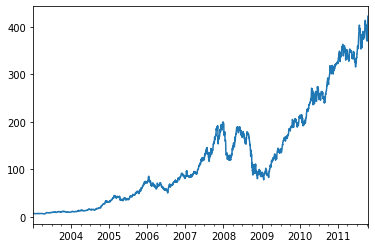

In [227]:
close_px.AAPL.plot()

<AxesSubplot:>

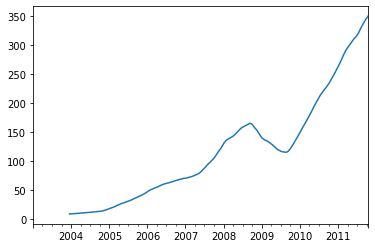

In [228]:
close_px.AAPL.rolling(250).mean().plot()

In [230]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [231]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

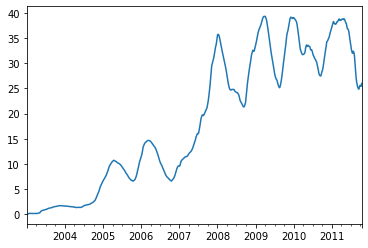

In [232]:
appl_std250.plot()

In [233]:
expanding_mean = appl_std250.expanding().mean()

<AxesSubplot:>

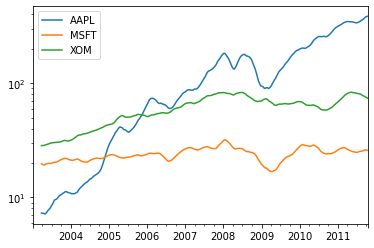

In [234]:
close_px.rolling(60).mean().plot(logy=True)

In [235]:
close_px.rolling('20D').mean()

AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
...                ...        ...        ...
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333

[2292 rows x 3 columns]

### **Exponentially Weighted Functions**

TypeError: 'module' object is not callable

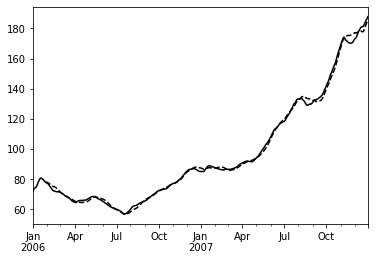

In [236]:
import matplotlib as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### **Binary Moving Window Functions**

In [237]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [238]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<AxesSubplot:>

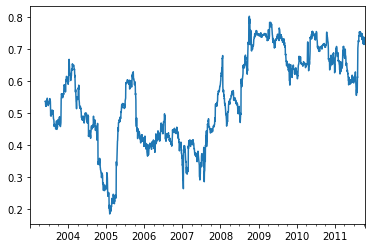

In [239]:
corr.plot()

<AxesSubplot:>

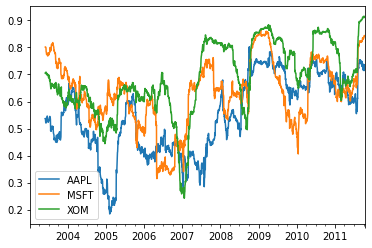

In [240]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### **User-Defined Moving Window Functions**

<AxesSubplot:>

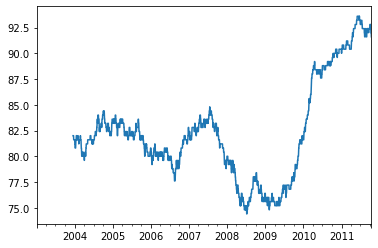

In [241]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

## **11.8 Conclusion**